
### 1. ENTORNO, CARGA DE DATOS Y MÉTRICAS

In [579]:
#importar librerias principales

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [580]:
# importar scikit-learn
import sklearn as sk
print("sklearn v", sk.__version__)


sklearn v 1.6.1


In [581]:
#cargar dataset
df = pd.read_csv('tips_con_nulos.csv')
print(df.head(5))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [582]:
# características y métricas
print("(rows, columns)")
print(df.shape)
print("_____________________________________________________________________")
print("describe general")
print()
print(df.describe(include='all')) 


(rows, columns)
(244, 7)
_____________________________________________________________________
describe general

        total_bill         tip   sex smoker  day    time        size
count   241.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.855768    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.921395    1.383638   NaN    NaN  NaN     NaN    0.951100
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000
25%      13.390000    2.000000   NaN    NaN  NaN     NaN    2.000000
50%      17.810000    2.900000   NaN    NaN  NaN     NaN    2.000000
75%      24.270000    3.562500   NaN    NaN  NaN     NaN    3.000000
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000


In [583]:
# info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  241 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [584]:
# moda de la columna day
print(df['day'].value_counts())
print("Moda:", (df['day'].mode()[0]))

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
Moda: Sat


In [585]:
# Ordenar valores por columnas

#print(df.sort_values('total_bill', ascending=False)) # ordenar por total_bill
#print(df.sort_values('tip', ascending=False))
print(df.sort_values('size', ascending=False))

     total_bill   tip     sex smoker   day    time  size
156       48.17  5.00    Male     No   Sun  Dinner     6
141       34.30  6.70    Male     No  Thur   Lunch     6
143       27.05  5.00  Female     No  Thur   Lunch     6
125       29.80  4.20  Female     No  Thur   Lunch     6
187       30.46  2.00    Male    Yes   Sun  Dinner     5
..          ...   ...     ...    ...   ...     ...   ...
236       12.60  1.00    Male    Yes   Sat  Dinner     2
111        7.25  1.00  Female     No   Sat  Dinner     1
82        10.07  1.83  Female     No  Thur   Lunch     1
67         3.07  1.00  Female    Yes   Sat  Dinner     1
222        8.58  1.92    Male    Yes   Fri   Lunch     1

[244 rows x 7 columns]


In [586]:
# Columnas interesantes para el entrenamiento del modelo
df[['total_bill', 'tip', 'size', 'time', 'sex']]

,total_bill,tip,size,time,sex
0,16.99,1.01,2,Dinner,Female
1,10.34,1.66,3,Dinner,Male
2,21.01,3.50,3,Dinner,Male
3,23.68,3.31,2,Dinner,Male
4,24.59,3.61,4,Dinner,Female
...,...,...,...,...,...
239,29.03,5.92,3,Dinner,Male
240,27.18,2.00,2,Dinner,Female
241,22.67,2.00,2,Dinner,Male
242,17.82,1.75,2,Dinner,Male


#### Carga y análisis preliminar del dataset

1. se importan librerías
2. se carga "tips_con_nulos.csv" con pandas
3. se explora el dataset
4. se crea una columna para analizar propinas por persona


### 2. LIMPIEZA DE DATOS

In [587]:
# Detectar valores faltantes
#print(df.isnull())
print(df.isnull().sum())
print()
# Filas que contienen datos nulos
print(df[df.isnull().any(axis=1)])

total_bill    3
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

    total_bill   tip     sex smoker  day    time  size
21         NaN  2.75  Female     No  Sat  Dinner     2
27         NaN  2.00    Male     No  Sat  Dinner     2
30         NaN  1.45    Male     No  Sat  Dinner     2


In [588]:
# Eliminar filas con valores faltantes

df = df.dropna() # elimina las filas con valores faltantes

print(df.isnull().sum())



total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [589]:
# tipos de datos del dataset original
df0 = pd.read_csv('tips_con_nulos.csv')
df0.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [590]:
# Convertir columnas no numéricas en categorías
df[['sex', 'smoker', 'day', 'time']] = df[['sex', 'smoker', 'day', 'time']].astype('category')

# Verificar los tipos de datos
print(df.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


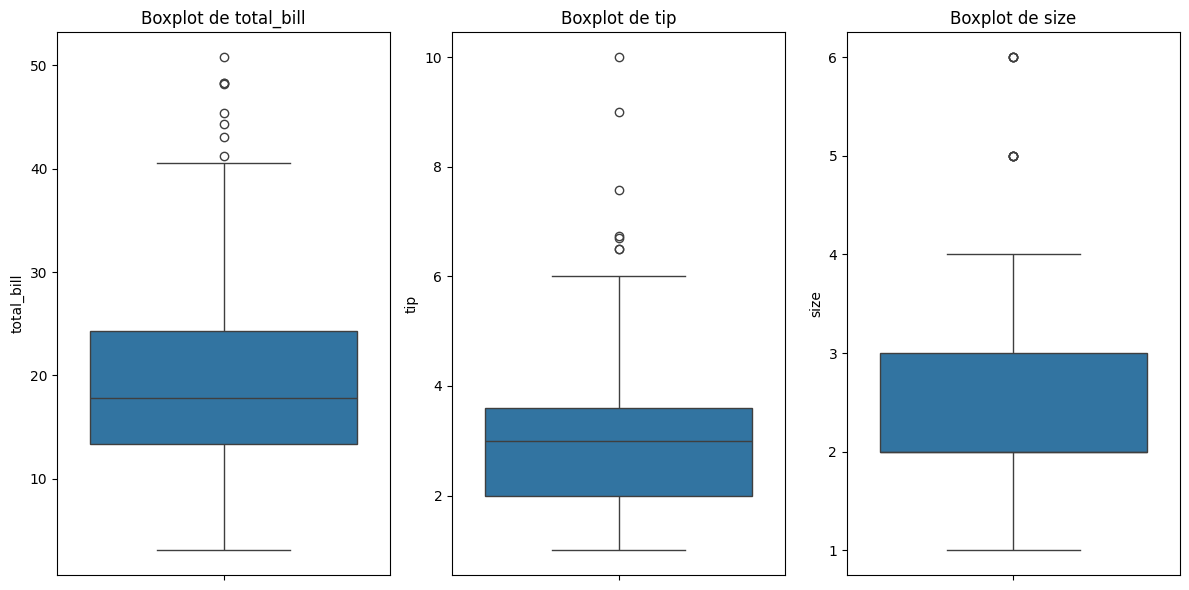

In [591]:
# Boxplot de las variables numéricas

columnas_num = df.select_dtypes(include=['float64', 'int64']).columns

# Adjust the number of subplots based on the number of numerical columns
fig, axes = plt.subplots(1, len(columnas_num), figsize=(12, 6))

# If there is only one numerical column, axes will not be an array, so we need to handle that case
if len(columnas_num) == 1:
    axes = [axes]

for i, col in enumerate(columnas_num):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

In [592]:
# Análisis de outliers


outliers = {}

for col in columnas_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

for col, outlier_df in outliers.items():
    print(f"Outliers for {col}:")
    print(outlier_df)
    print("__________________________________________________")

    print(df.shape)

    

Outliers for total_bill:
     total_bill    tip     sex smoker   day    time  size
59        48.27   6.73    Male     No   Sat  Dinner     4
102       44.30   2.50  Female    Yes   Sat  Dinner     3
142       41.19   5.00    Male     No  Thur   Lunch     5
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
182       45.35   3.50    Male    Yes   Sun  Dinner     3
197       43.11   5.00  Female    Yes  Thur   Lunch     4
212       48.33   9.00    Male     No   Sat  Dinner     4
__________________________________________________
(241, 7)
Outliers for tip:
     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
183       23.17   6.50    Male    Yes   Sun  Dinner     4
212       48.33   9.00    M

In [593]:
# porcentaje de outliers
print("Porcentaje de outliers:")
for col, outlier_df in outliers.items():
    print(f" {col}: {len(outlier_df) / 241 * 100:.2f}%")

# porcentaje de outliers únicos
print("Porcentaje total de outliers:")
outliers_unicos = pd.concat(outliers.values()).drop_duplicates()
print(f" {len(outliers_unicos) / 241 * 100:.2f}%")

Porcentaje de outliers:
 total_bill: 3.32%
 tip: 2.90%
 size: 3.73%
Porcentaje total de outliers:
 7.47%


In [594]:
# Se decide eliminar filas con outliers

df0 = df.copy()

all_outliers = pd.concat(outliers.values())

df = df.drop(all_outliers.index, errors='ignore')
df.shape

(223, 7)

#### Documentación de la limpieza datos
1. Se han identificado 3 datos nulos en las filas 21, 27 y 30 de la columna "total_bill"
2. Se procede a eliminar dichas columnas del df, ya que son muy pocas filas
3. Acto seguido se comprobó que no quedaban datos nulos
4. "size" tiene un rango inferior a 128 y se le otorga int8
5. los datos no numéricos se pasan a "category"
6. Se identifican ouliers, que junto a los nulos, no llega al 10% de la muestra
7. Se procede a la eliminación de las filas con ouliers en **df_cleaned**


### 3. EDAS univariante, bivariante y multivariante

#### Univariante

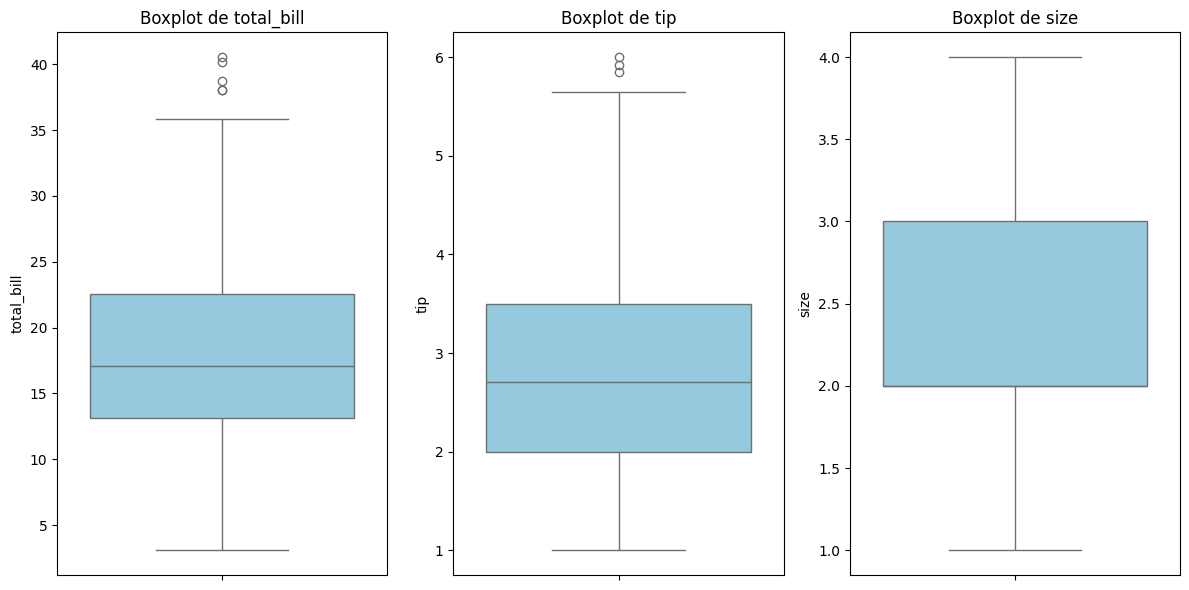

In [595]:
# Boxplot de las variables numéricas

columnas_num = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(1, len(columnas_num), figsize=(12, 6))

if len(columnas_num) == 1:
    axes = [axes]

for i, col in enumerate(columnas_num):
    sns.boxplot(data=df, y=col, ax=axes[i], color='#87CEEB')
    axes[i].set_title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

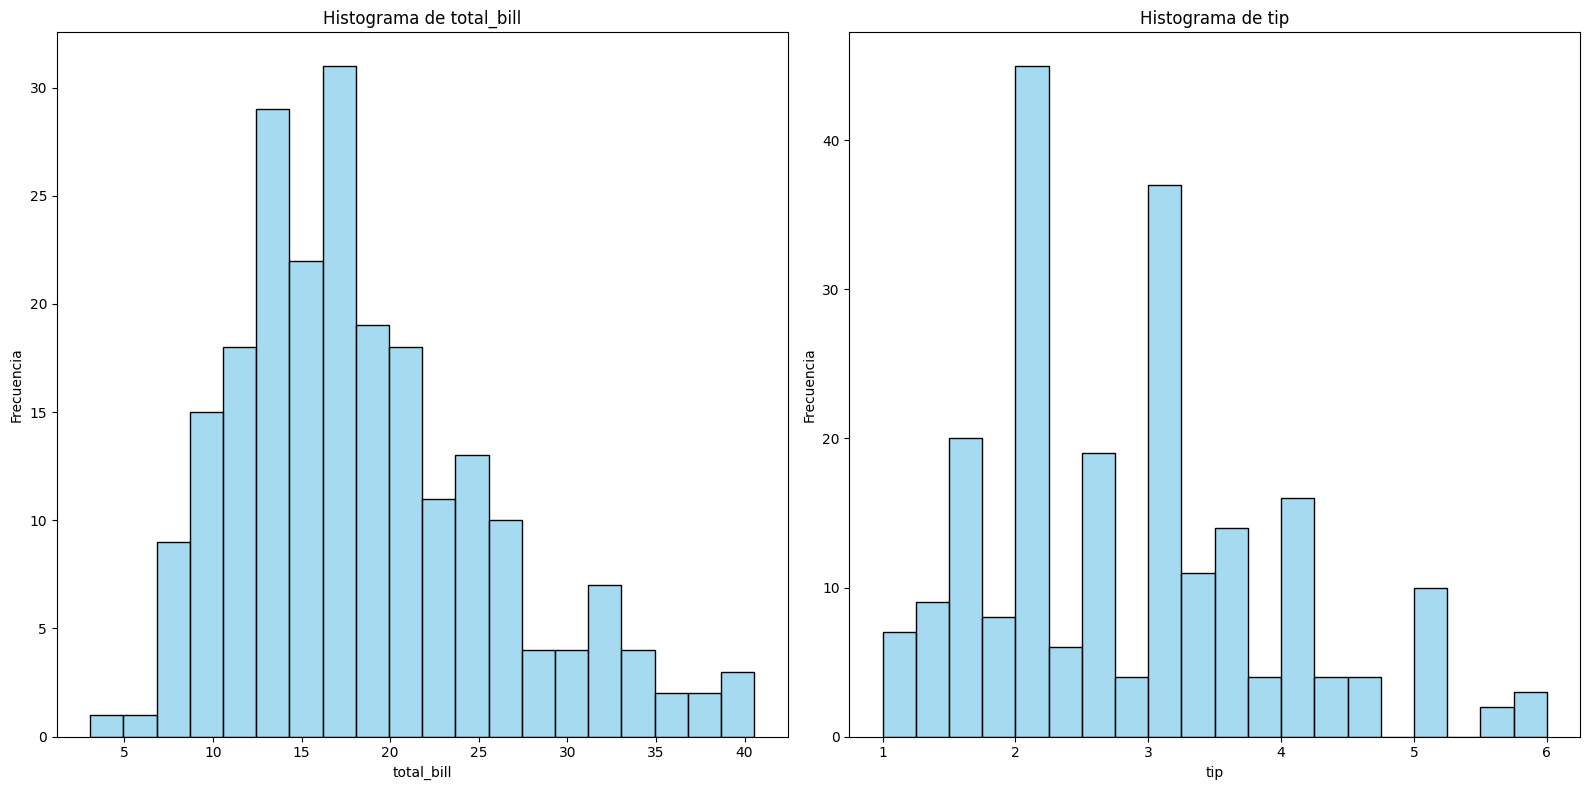

In [596]:
# Histogramas de las variables numéricas

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Columnas a graficar
columnas_a_graficar = ['total_bill', 'tip']

for i, col in enumerate(columnas_a_graficar):
    sns.histplot(df[col], kde=False, bins=20, color='#87CEEB', ax=axes[i])
    axes[i].set_title(f"Histograma de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

#### Bivariante

Text(0.5, 1.0, 'Total bill vs tip')

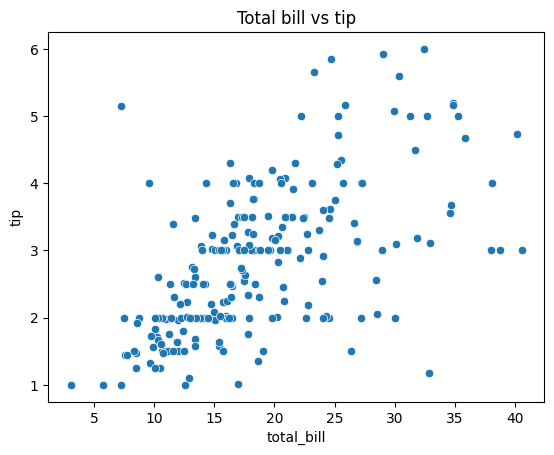

In [597]:
# scatterplot total_bil vs tip
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title("Total bill vs tip")

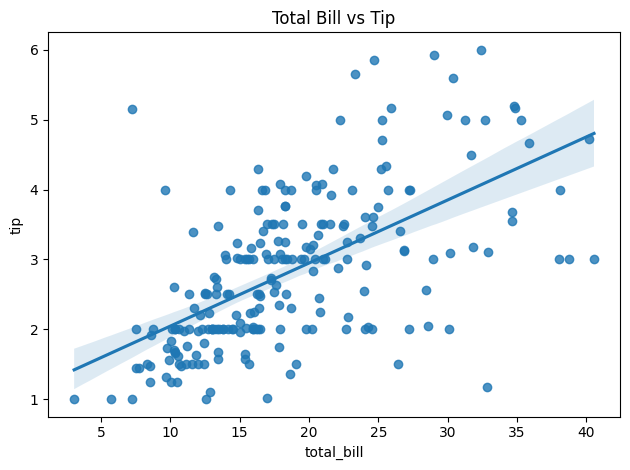

In [598]:
# regplot total_bill vs tip

sns.regplot(data=df, x='total_bill', y='tip')
plt.title('Total Bill vs Tip')
plt.tight_layout()
plt.show()




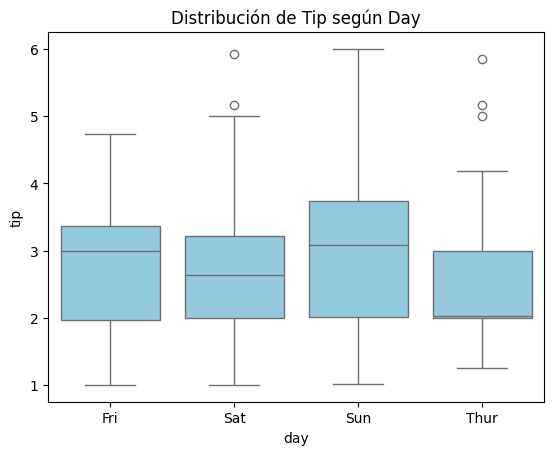

In [599]:
# Distribución de Tip según Day
sns.boxplot(x='day', y='tip', data=df, color='#87CEEB')
plt.title("Distribución de Tip según Day")
plt.show()

#### Multivariante

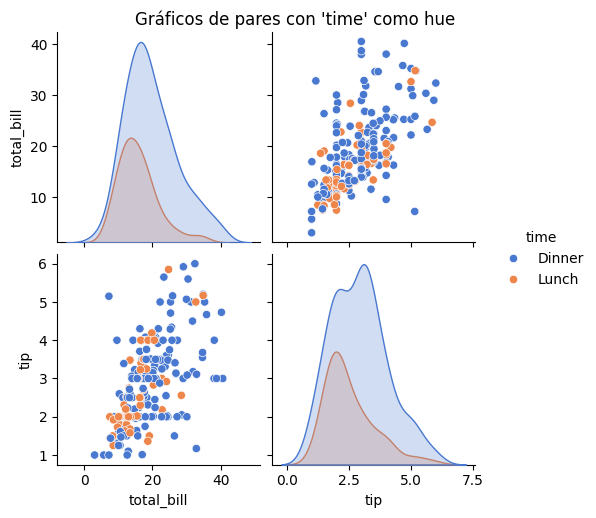

In [600]:
# Pairplot para variables numéricas
sns.pairplot(data=df, vars=['total_bill', 'tip'], hue='time', palette='muted', diag_kind='kde')
plt.suptitle("Gráficos de pares con 'time' como hue", y=1.02)
plt.show()


            total_bill       tip      size
total_bill    1.000000  0.602954  0.537644
tip           0.602954  1.000000  0.395291
size          0.537644  0.395291  1.000000


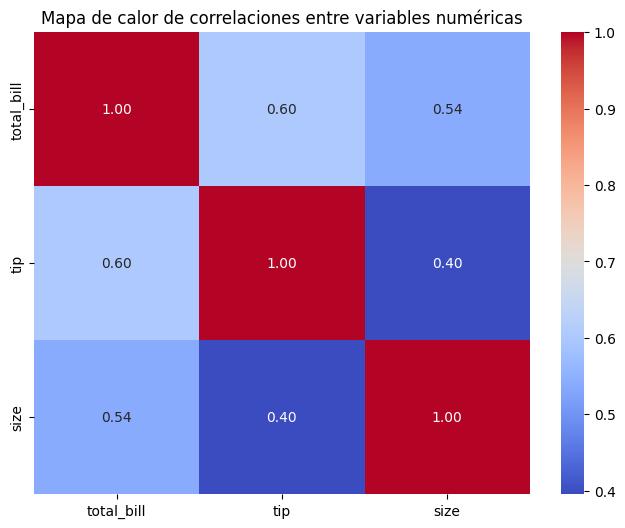

In [601]:
# Calcular la matriz de correlación
correlation_matrix = df[['total_bill', 'tip', 'size']].corr()
print(correlation_matrix)

# Mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()

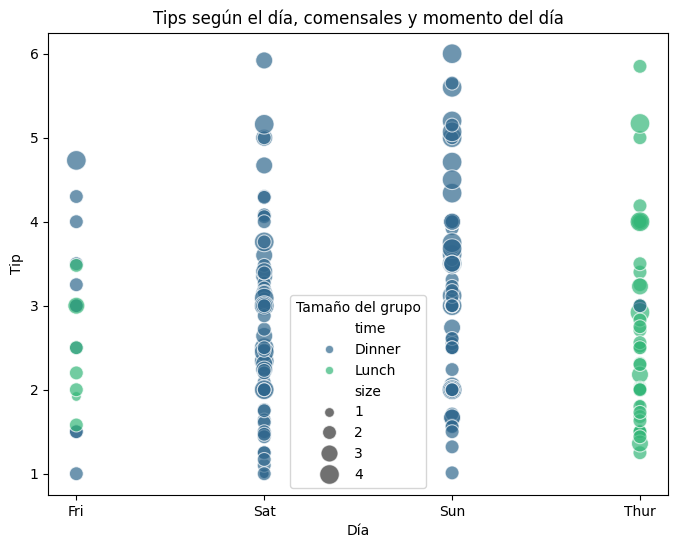

In [602]:
# Relación entre 'day' y 'tip' con comensales ('size') y momento del día ('time')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='day', y='tip', size='size', hue='time', alpha=0.7, palette='viridis', sizes=(50, 200))
plt.title("Tips según el día, comensales y momento del día")
plt.xlabel("Día")
plt.ylabel("Tip")
plt.legend(title="Tamaño del grupo")
plt.show()


### 4. Preparación de datos

In [603]:
# Identificar variables categóricas
columnas_cat = df.select_dtypes(include=['category']).columns

# Codificar variables categóricas con pd.get_dummies()
df_clean = pd.get_dummies(df, columns=columnas_cat, drop_first=True)

# Verificar las primeras filas del DataFrame codificado
print("Primeras filas de df_clean:")
print(df_clean.head())

# Verificar las nuevas dimensiones del dataset
print("\nDimensiones de df_clean", df_clean.shape)


Primeras filas de df_clean:
   total_bill   tip  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
0       16.99  1.01     2     False       False    False     True     False   
1       10.34  1.66     3      True       False    False     True     False   
2       21.01  3.50     3      True       False    False     True     False   
3       23.68  3.31     2      True       False    False     True     False   
4       24.59  3.61     4     False       False    False     True     False   

   time_Lunch  
0       False  
1       False  
2       False  
3       False  
4       False  

Dimensiones de df_clean (223, 9)


### 5. Modelado

##### Regresión Lineal Simple

In [604]:
# Fit del modelo de regresión lineal

from sklearn.linear_model import LinearRegression

X = df_clean[['total_bill']]
y = df_clean['tip']

model = LinearRegression() 

model.fit(X, y) 

print('intercepto (w0 / b0):', model.intercept_)

print('coeficientes (w1, b1):', model.coef_)

y_pred = model.predict(X)

intercepto (w0 / b0): 1.141886291578633
coeficientes (w1, b1): [0.09028387]


<Axes: xlabel='total_bill', ylabel='tip'>

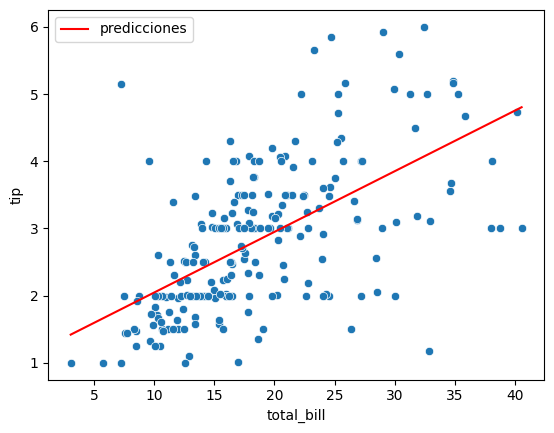

In [605]:
# Gráfico de dispersión y línea de regresión
sns.scatterplot(x='total_bill', y='tip', data=df_clean)
sns.lineplot(x=df_clean['total_bill'], y=y_pred, color='r', label='predicciones')

In [606]:
# Test del modelo

X_new = pd.DataFrame([5.35, 8.90, 29.20, 59.20], columns=['total_bill'])
                     
#model.predict([[8.90], [17.75], [29.20]])

model.predict(X_new)

array([1.62490499, 1.94541272, 3.77817524, 6.48669129])

In [607]:
# métricas de scikit learn para la regresión

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error


r2 = r2_score(y, y_pred)
print('r2:', r2)

mae = mean_absolute_error(y, y_pred)
print('mae:', mae)

mape = mean_absolute_percentage_error(y, y_pred)
print('mape:', mape)

mse = mean_squared_error(y, y_pred)
print('mse:', mse)

rmse = root_mean_squared_error(y, y_pred)
print('rmse:', rmse)

r2: 0.3635536961953373
mae: 0.6760754072471729
mape: 0.27492153302228733
mse: 0.765591483402765
rmse: 0.8749808474491113


 La r2 de este modelo es 0.36, lo que indica que solo se explica el 36% de la variabilidad de 'tip'. 

 Ahora, se puede intentar mejorar el modelo, escalando,  añadiendo más variables predictoras o utilizando otro tipo de modelo. 
 
 Otra opción sería probar una iteración donde no se eliminan los outliers de la columna Size.

In [608]:
#escalar columnas numéricas

df_scaled = df_clean.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled[columnas_num] = scaler.fit_transform(df_scaled[columnas_num])



In [609]:
# vamos a ver los valores de df_clean y df_scaled tras escalar

print(df_clean)
print(df_scaled)

     total_bill   tip  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
0         16.99  1.01     2     False       False    False     True     False   
1         10.34  1.66     3      True       False    False     True     False   
2         21.01  3.50     3      True       False    False     True     False   
3         23.68  3.31     2      True       False    False     True     False   
4         24.59  3.61     4     False       False    False     True     False   
..          ...   ...   ...       ...         ...      ...      ...       ...   
239       29.03  5.92     3      True       False     True    False     False   
240       27.18  2.00     2     False        True     True    False     False   
241       22.67  2.00     2      True        True     True    False     False   
242       17.82  1.75     2      True       False     True    False     False   
243       18.78  3.00     2     False       False    False    False      True   

     time_Lunch  
0        

intercepto (w0 / b0): -1.0448868716689146e-16
coeficientes (w1, b1): [0.60295414]
r2: 0.3635536961953377
mae: 0.6164210713475806
mape: 1.0801778392782553
mse: 0.6364463038046626
rmse: 0.7977758480956055


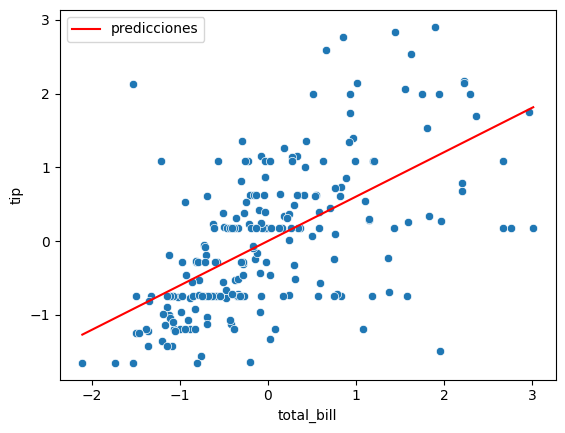

In [610]:
# Fit del modelo de regresión lineal con datos escalados

X = df_scaled[['total_bill']]
y = df_scaled['tip']

model = LinearRegression()

model.fit(X, y)

print('intercepto (w0 / b0):', model.intercept_)
print('coeficientes (w1, b1):', model.coef_)

y_pred = model.predict(X)

# Gráfico de dispersión y línea de regresión

sns.scatterplot(x='total_bill', y='tip', data=df_scaled)

sns.lineplot(x=df_scaled['total_bill'], y=y_pred, color='r', label='predicciones')

# métricas después de escalar

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error


r2 = r2_score(y, y_pred)
print('r2:', r2)

mae = mean_absolute_error(y, y_pred)
print('mae:', mae)

mape = mean_absolute_percentage_error(y, y_pred)
print('mape:', mape)

mse = mean_squared_error(y, y_pred)
print('mse:', mse)

rmse = root_mean_squared_error(y, y_pred)
print('rmse:', rmse)

##### Regresión Lineal Múltiple

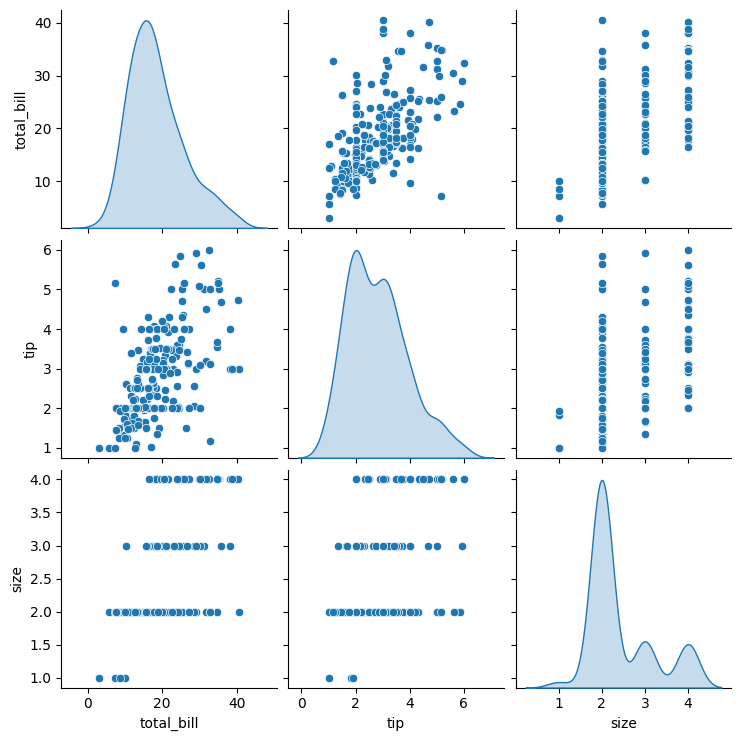

In [611]:
# Matriz de correlación de df_clean para columnas numéricas

sns.pairplot(df_clean[['total_bill', 'tip', 'size']], diag_kind='kde')

In [612]:
# Entrenamiento del modelo con dos variables
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

X = df_clean[['total_bill', 'size']]
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('r2:', r2)

mae = mean_absolute_error(y_test, y_pred)
print('mae:', mae)

mape = mean_absolute_percentage_error(y_test, y_pred)
print('mape:', mape)

mse = mean_squared_error(y_test, y_pred)
print('mse:', mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 

r2: -0.27060129156757884
mae: 0.7669315243213839
mape: 0.2602965608627803
mse: 1.0439350565388852


In [613]:
# Vamos a probar un knn con k=3 y k=5

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2:', r2)
print('mae:', mae)
print('mape:', mape)
print('mse:', mse)
print('rmse:', rmse)

model = KNeighborsRegressor(n_neighbors=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2:', r2)
print('mae:', mae)
print('mape:', mape)
print('mse:', mse)
print('rmse:', rmse)




r2: -0.04026682063169851
mae: 0.6657037037037037
mape: 0.22899521814619606
mse: 0.8546906172839506
rmse: 0.9244947902957326
r2: -0.11023522462209545
mae: 0.6405777777777777
mape: 0.21633762608229737
mse: 0.9121771555555556
rmse: 0.9550796592722283


In [614]:
# Árbol de decisión

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2:', r2)
print('mae:', mae)
print('mape:', mape)
print('mse:', mse)
print('rmse:', rmse)


r2: -0.7056354591759455
mae: 0.8646666666666667
mape: 0.31036364417963064
mse: 1.4013622222222224
rmse: 1.183791460613829


In [615]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print('r2:', r2)
print('mae:', mae)
print('mape:', mape)
print('mse:', mse)
print('rmse:', rmse)

r2: -0.14080348131948606
mae: 0.6947344973544975
mape: 0.24398661957387294
mse: 0.9372922526324017
rmse: 0.96813855032862


In [616]:
# vamos a transformar los datos de tip y total_bill en logaritmo

df_clean['tip'] = np.log1p(df_clean['tip'])	

df_clean['total_bill'] = np.log1p(df_clean['total_bill'])	

# Eliminar filas con valores faltantes
df_clean = df_clean.dropna()

# Fit del modelo de regresión lineal con datos transformados

X = df_clean[['total_bill']]

y = df_clean['tip']


model = LinearRegression()

model.fit(X, y)

print('intercepto (w0 / b0):', model.intercept_)

print('coeficientes (w1, b1):', model.coef_)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print('r2:', r2)

intercepto (w0 / b0): -0.07797482596483118
coeficientes (w1, b1): [0.47428096]
r2: 0.3978192340265685


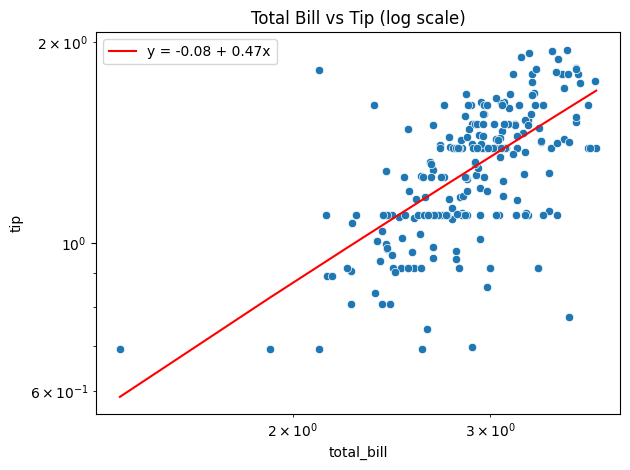

y = -0.08 + 0.47x


In [617]:
# scatterplot total_bill vs tip en escala logarítmica con la línea de regresión y su ecuación

# Ensure that the predictions are made on the same DataFrame
y_pred = model.predict(df_clean[['total_bill']])

sns.scatterplot(x='total_bill', y='tip', data=df_clean)

sns.lineplot(x=df_clean['total_bill'], y=y_pred, color='r', label=f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x')

plt.xscale('log')

plt.yscale('log')

plt.title('Total Bill vs Tip (log scale)')

plt.tight_layout()

plt.show()

# mostrar ecuación de la línea de regresión

print(f"y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x")

La correlación entre total_bill y tip es muy baja, por lo que no se puede hacer una regresión lineal robusta con estos datos. 

No obstante es el mejor modelo para este dataset.

El resto de modelos muestran una r2 más baja.

Conclusión: las propinas que los clientes dejan no están directamente relacionadas con el total de la cuenta.